# Generating a Gaussian Distribution with an RNG
## Packages and Config

In [67]:
using StatsPlots, LaTeXStrings, Statistics, StatsBase, Distributions, LinearAlgebra
figpath = "fig/"
Plots.default(titlefontsize=18, tickfontsize=10, labelfontsize=14, legendfont=10,
    fontfamily="Computer Modern")

## Gaussian Distribution Random Number Generator

In [41]:
"""
Generates `n` random numbers with a gaussian distribution with standard deviation `σ`.
(slight oversight: if n is odd, n+1 random numbers will be generated)
"""
function gaussrng(σ, n::Integer)
    if n % 2 != 0
        n += 1
    end

    x₁, x₂ = rand(n ÷ 2), rand(n ÷ 2)

    ρ = σ * .√(2 * log.(1 ./ (1 .- x₁)))
    θ = 2π * x₂

    y₁ = ρ .* sin.(θ)
    y₂ = ρ .* cos.(θ)

    return [y₁; y₂]
end

gaussrng

## Plots

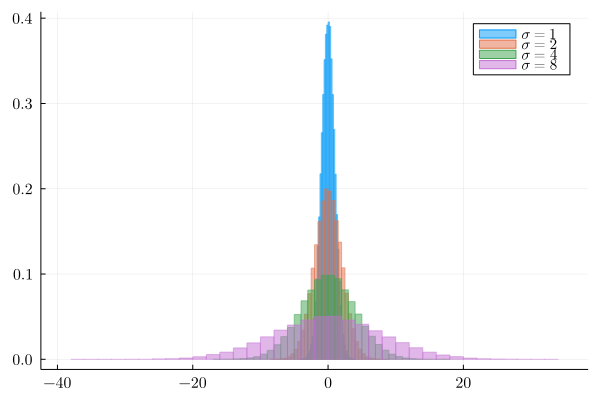

In [44]:
samples = 100000
histograms = [normalize(fit(Histogram, gaussrng(σ, samples), nbins=50), mode=:pdf) for σ in (1, 2, 4, 8)]
p = plot(histograms, alpha=0.5, lc=:match, label=reshape([L"\sigma=%$σ" for σ in (1, 2, 4, 8)], (1, 4)))

savefig(p, figpath * "gaussian-overlay.pdf")
display(p)

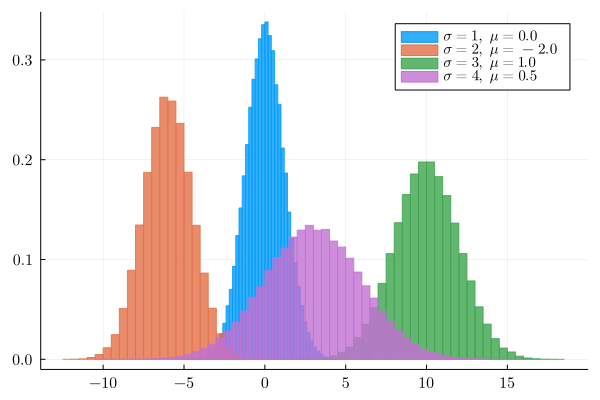

In [63]:
histograms = [normalize(fit(Histogram, gaussrng(σ, samples) .+ μ, nbins=50), mode=:pdf)
    for (σ, μ) in zip([1.2, 1.5, 2, 3], [0, -6, 10, 3])]
labels = reshape([L"\sigma=%$σ,\ \mu=%$μ" for (σ, μ) in zip(1:4, [0, -2, 1, 0.5])], (1, 4))
p = plot(histograms, alpha=0.8, lc=:match, label=labels)

savefig(p, figpath * "gaussian-spread.pdf")
display(p)

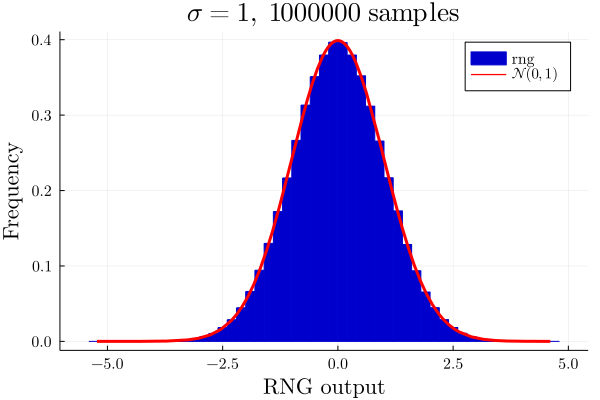

In [69]:
samples = 1000000
dist = gaussrng(1, samples)
hist = normalize(fit(Histogram, dist, nbins=50), mode=:pdf)

p = plot(hist, color=:mediumblue, lc=:match, label="rng",
    xlabel="RNG output", ylabel="Frequency", title=L"\sigma=1,\ %$samples\ \textrm{samples}")
plot!(p, Normal(0, 1), extrema(dist)..., color=:red, lw=3, label=L"\mathcal{N}(0, 1)")

savefig(p, figpath * "gaussian-check.pdf")
display(p)